In [1]:
import numpy as np
import pandas as pd
pd.pandas.set_option('display.max_columns',None)

import seaborn as sns
sns.set(font_scale=1.2)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load dataset

In [2]:
df = pd.read_excel(r'part6\Historical Weather Data 2010-2021.xlsx', sheet_name='201021')
df.head()

,observation,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,Relative humidity_6to7,Relative humidity_avg(%),windspeedKmph_7to8,windspeedKmph_1to2,windspeedKmph_6to7,windspeedKmph_avg(Km/h),pressureMB_7to8,pressureMB_1to2,pressureMB_6to7,pressureMB_avg,precipMM_7to8,precipMM_1to2,precipMM_6to7,precipMM_avg(mm),weatherDesc_7to8,weatherDesc_1to2,weatherDesc_6to7,Sunshine Hours,%_soil_moisure,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora
0,2010-01-01,20,30,20,23,42,33,59,44,9,2,4,5,1015,1012,1013,1013,0.0,0.0,0.0,0.0,Clear,Sunny,Sunny,9.8,45,6.91,7.18,1709.0,NO,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,23,29,23,25,49,40,62,50,9,3,3,5,1015,1013,1015,1014,0.0,0.0,0.0,0.0,Clear,Partly cloudy,Partly cloudy,9.8,45,6.77,7.66,1707.0,YES,Bacterial Blight,Anthracnose,NaN,NaN,NaN
2,2010-01-03,24,27,21,24,61,50,78,63,4,8,6,6,1017,1014,1015,1015,0.0,0.0,0.0,0.0,Partly cloudy,Partly cloudy,Partly cloudy,9.8,41,6.76,7.44,1707.0,NO,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,23,29,20,24,57,30,52,46,5,7,6,6,1016,1012,1013,1013,0.0,0.0,0.0,0.0,Clear,Sunny,Sunny,9.8,43,7.10,7.43,1708.0,NO,NaN,NaN,NaN,NaN,NaN
4,2010-01-05,22,30,21,24,48,34,54,45,6,2,4,4,1013,1010,1012,1011,0.0,0.0,0.0,0.0,Clear,Sunny,Sunny,9.8,44,6.53,8.05,1709.0,NO,NaN,NaN,NaN,NaN,NaN


In [3]:
# list of columns
print('List of columns in dataframe : \n', list(df.columns))

List of columns in dataframe : 
 ['observation', 'tempC_7to8', 'tempC_1to2', 'tempC_6to7', 'tempC_avg(0C)', 'Relative humidity_7to8', 'Relative humidity_1to2', 'Relative humidity_6to7', 'Relative humidity_avg(%)', 'windspeedKmph_7to8', 'windspeedKmph_1to2', 'windspeedKmph_6to7', 'windspeedKmph_avg(Km/h)', 'pressureMB_7to8', 'pressureMB_1to2', 'pressureMB_6to7', 'pressureMB_avg', 'precipMM_7to8', 'precipMM_1to2', 'precipMM_6to7', 'precipMM_avg(mm)', 'weatherDesc_7to8', 'weatherDesc_1to2', 'weatherDesc_6to7', 'Sunshine Hours', '%_soil_moisure', 'soil_pH', 'water_pH', 'water_TDS_mgpl', 'Label (Disease Yes/No)', 'Type of Disease (Bacterial Blight/Telya)', 'Anthracnose', 'Fruit Spot/ Rot', 'Fusarium Wilt', 'Fruit Borer / Blight Blora']


In [4]:
# shape of the dataframe
df.shape

(4227, 35)

In [5]:
# dataframe raw information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4227 entries, 0 to 4226
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   observation                               4227 non-null   datetime64[ns]
 1   tempC_7to8                                4227 non-null   int64         
 2   tempC_1to2                                4227 non-null   int64         
 3   tempC_6to7                                4227 non-null   int64         
 4   tempC_avg(0C)                             4227 non-null   int64         
 5   Relative humidity_7to8                    4227 non-null   int64         
 6   Relative humidity_1to2                    4227 non-null   int64         
 7   Relative humidity_6to7                    4227 non-null   int64         
 8   Relative humidity_avg(%)                  4227 non-null   int64         
 9   windspeedKmph_7to8            

# Observation:

1. We have total `35 columns` including dependent and independent variables and `4227 rows`

2. Columns with Null values 

> - Type of Disease (Bacterial Blight/Telya)  1174 non-null
> - Anthracnose                               676 non-null
> - Fruit Spot/ Rot                           464 non-null
> - Fusarium Wilt                             103 non-null
> - Fruit Borer / Blight Blora                787 non-null

3. List of dependent and independent variables

> - Independent Variables: 
>> 'observation', 'tempC_7to8', 'tempC_1to2', 'tempC_6to7', 'tempC_avg(0C)', 'Relative humidity_7to8', 'Relative humidity_1to2', 'Relative humidity_6to7', 'Relative humidity_avg(%)', 'windspeedKmph_7to8', 'windspeedKmph_1to2', 'windspeedKmph_6to7', 'windspeedKmph_avg(Km/h)', 'pressureMB_7to8', 'pressureMB_1to2', 'pressureMB_6to7', 'pressureMB_avg', 'precipMM_7to8', 'precipMM_1to2', 'precipMM_6to7', 'precipMM_avg(mm)', 'weatherDesc_7to8', 'weatherDesc_1to2', 'weatherDesc_6to7', 'Sunshine Hours', '%_soil_moisure', 'soil_pH', 'water_pH', 'water_TDS_mgpl'.

> - Count of Independent Variables: `29`

> - Dependent Variables: 
>> 'Label (Disease Yes/No)', 'Type of Disease (Bacterial Blight/Telya)', 'Anthracnose', 'Fruit Spot/ Rot', 'Fusarium Wilt', 'Fruit Borer / Blight Blora'.

> - Count of Dependent Variables: `6`

In [6]:
# data type of each column
df.dtypes

observation                                 datetime64[ns]
tempC_7to8                                           int64
tempC_1to2                                           int64
tempC_6to7                                           int64
tempC_avg(0C)                                        int64
Relative humidity_7to8                               int64
Relative humidity_1to2                               int64
Relative humidity_6to7                               int64
Relative humidity_avg(%)                             int64
windspeedKmph_7to8                                   int64
windspeedKmph_1to2                                   int64
windspeedKmph_6to7                                   int64
windspeedKmph_avg(Km/h)                              int64
pressureMB_7to8                                      int64
pressureMB_1to2                                      int64
pressureMB_6to7                                      int64
pressureMB_avg                                       int

# Find missing value

In [7]:
df.isnull().sum()

observation                                    0
tempC_7to8                                     0
tempC_1to2                                     0
tempC_6to7                                     0
tempC_avg(0C)                                  0
Relative humidity_7to8                         0
Relative humidity_1to2                         0
Relative humidity_6to7                         0
Relative humidity_avg(%)                       0
windspeedKmph_7to8                             0
windspeedKmph_1to2                             0
windspeedKmph_6to7                             0
windspeedKmph_avg(Km/h)                        0
pressureMB_7to8                                0
pressureMB_1to2                                0
pressureMB_6to7                                0
pressureMB_avg                                 0
precipMM_7to8                                  0
precipMM_1to2                                  0
precipMM_6to7                                  0
precipMM_avg(mm)    

In [8]:
fetures_with_nan = [fetures for fetures in df.columns if df[fetures].isnull().sum()>=1]
fetures_with_nan

['Type of Disease (Bacterial Blight/Telya)',
 'Anthracnose',
 'Fruit Spot/ Rot',
 'Fusarium Wilt',
 'Fruit Borer / Blight Blora']

In [9]:
for feture in fetures_with_nan:
    print(f'Feture {feture} has {round(df[feture].isnull().mean()*100,3)} % average missing values.')

Feture Type of Disease (Bacterial Blight/Telya) has 72.226 % average missing values.
Feture Anthracnose has 84.008 % average missing values.
Feture Fruit Spot/ Rot has 89.023 % average missing values.
Feture Fusarium Wilt has 97.563 % average missing values.
Feture Fruit Borer / Blight Blora has 81.382 % average missing values.


In [10]:
fetures_with_nan_percen = {feture:round(df[feture].isnull().mean()*100,2) for feture in fetures_with_nan}
fetures_with_nan_percen

{'Type of Disease (Bacterial Blight/Telya)': 72.23,
 'Anthracnose': 84.01,
 'Fruit Spot/ Rot': 89.02,
 'Fusarium Wilt': 97.56,
 'Fruit Borer / Blight Blora': 81.38}

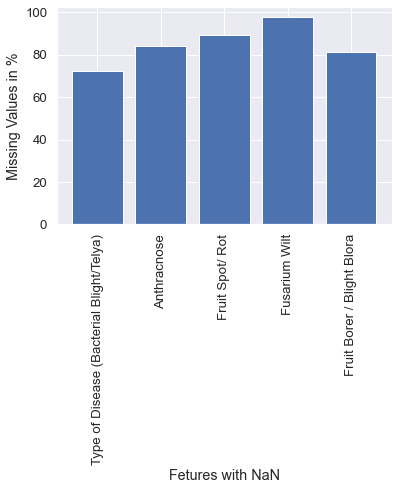

In [11]:
plt.bar(range(len(fetures_with_nan_percen)), list(fetures_with_nan_percen.values()), align='center')
plt.xticks(range(len(fetures_with_nan_percen)), list(fetures_with_nan_percen.keys()), rotation = 90)

plt.xlabel('Fetures with NaN')
plt.ylabel('Missing Values in %')

plt.show()

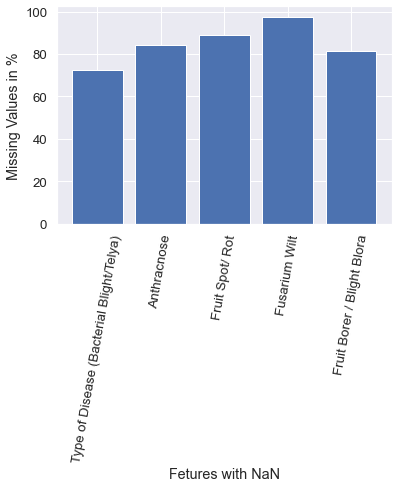

In [12]:
plt.bar(*zip(*fetures_with_nan_percen.items()))
plt.xticks(range(len(fetures_with_nan_percen)), list(fetures_with_nan_percen.keys()), rotation = 80)
plt.xlabel('Fetures with NaN')
plt.ylabel('Missing Values in %')
plt.show()

# Find types of variables

In [13]:
# Numarical variables
numarical_fetures = [fetures for fetures in df.columns if df[fetures].dtypes != 'O' and fetures != 'observation']
print(f'Numarical variables are : {numarical_fetures}')
print(f'Length of Numarical variables : {len(numarical_fetures)}')

Numarical variables are : ['tempC_7to8', 'tempC_1to2', 'tempC_6to7', 'tempC_avg(0C)', 'Relative humidity_7to8', 'Relative humidity_1to2', 'Relative humidity_6to7', 'Relative humidity_avg(%)', 'windspeedKmph_7to8', 'windspeedKmph_1to2', 'windspeedKmph_6to7', 'windspeedKmph_avg(Km/h)', 'pressureMB_7to8', 'pressureMB_1to2', 'pressureMB_6to7', 'pressureMB_avg', 'precipMM_7to8', 'precipMM_1to2', 'precipMM_6to7', 'precipMM_avg(mm)', 'Sunshine Hours', '%_soil_moisure', 'soil_pH', 'water_pH', 'water_TDS_mgpl']
Length of Numarical variables : 25


In [14]:
# Temporal variables (eg. datetime variable)
temporal_fetures = ['observation']
print(f'Temporal variables are : {temporal_fetures}')
print(f'Length of Temporal variables : {len(temporal_fetures)}')

Temporal variables are : ['observation']
Length of Temporal variables : 1


In [15]:
# Categorical variables
categorical_fetures = [fetures for fetures in df.columns if df[fetures].dtypes == 'O']
print(f'Categorical variables are : {categorical_fetures}')
print(f'Length of Categorical variables : {len(categorical_fetures)}')

Categorical variables are : ['weatherDesc_7to8', 'weatherDesc_1to2', 'weatherDesc_6to7', 'Label (Disease Yes/No)', 'Type of Disease (Bacterial Blight/Telya)', 'Anthracnose', 'Fruit Spot/ Rot', 'Fusarium Wilt', 'Fruit Borer / Blight Blora']
Length of Categorical variables : 9


# Handle Missing Values

In [16]:
data = df.iloc[:,-6:].copy()
for fetures in data.columns:
    df[fetures].fillna(0, inplace=True)
df.head()

,observation,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,Relative humidity_6to7,Relative humidity_avg(%),windspeedKmph_7to8,windspeedKmph_1to2,windspeedKmph_6to7,windspeedKmph_avg(Km/h),pressureMB_7to8,pressureMB_1to2,pressureMB_6to7,pressureMB_avg,precipMM_7to8,precipMM_1to2,precipMM_6to7,precipMM_avg(mm),weatherDesc_7to8,weatherDesc_1to2,weatherDesc_6to7,Sunshine Hours,%_soil_moisure,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora
0,2010-01-01,20,30,20,23,42,33,59,44,9,2,4,5,1015,1012,1013,1013,0.0,0.0,0.0,0.0,Clear,Sunny,Sunny,9.8,45,6.91,7.18,1709.0,NO,0,0,0,0,0
1,2010-01-02,23,29,23,25,49,40,62,50,9,3,3,5,1015,1013,1015,1014,0.0,0.0,0.0,0.0,Clear,Partly cloudy,Partly cloudy,9.8,45,6.77,7.66,1707.0,YES,Bacterial Blight,Anthracnose,0,0,0
2,2010-01-03,24,27,21,24,61,50,78,63,4,8,6,6,1017,1014,1015,1015,0.0,0.0,0.0,0.0,Partly cloudy,Partly cloudy,Partly cloudy,9.8,41,6.76,7.44,1707.0,NO,0,0,0,0,0
3,2010-01-04,23,29,20,24,57,30,52,46,5,7,6,6,1016,1012,1013,1013,0.0,0.0,0.0,0.0,Clear,Sunny,Sunny,9.8,43,7.10,7.43,1708.0,NO,0,0,0,0,0
4,2010-01-05,22,30,21,24,48,34,54,45,6,2,4,4,1013,1010,1012,1011,0.0,0.0,0.0,0.0,Clear,Sunny,Sunny,9.8,44,6.53,8.05,1709.0,NO,0,0,0,0,0


In [17]:
for fetures in df.columns[-6:]:
    print(f"fetures : {fetures}, \nUnique values : {df[fetures].unique()},\
    \nCount of Unique values : {len(df[fetures].unique())} \nValue count : \n{df[fetures].value_counts()} \n")

fetures : Label (Disease Yes/No), 
Unique values : ['NO' 'YES' 'yes' 'Yes'],    
Count of Unique values : 4 
Value count : 
NO     2470
YES    1746
yes      10
Yes       1
Name: Label (Disease Yes/No), dtype: int64 

fetures : Type of Disease (Bacterial Blight/Telya), 
Unique values : [0 'Bacterial Blight' 'Bacterial Blight (Telya)'],    
Count of Unique values : 3 
Value count : 
0                           3053
Bacterial Blight             875
Bacterial Blight (Telya)     299
Name: Type of Disease (Bacterial Blight/Telya), dtype: int64 

fetures : Anthracnose, 
Unique values : [0 'Anthracnose' 'Anthrocnose' 'Anthocnose' 'Antrocnose'],    
Count of Unique values : 5 
Value count : 
0              3551
Anthrocnose     438
Anthracnose     219
Anthocnose       17
Antrocnose        2
Name: Anthracnose, dtype: int64 

fetures : Fruit Spot/ Rot, 
Unique values : [0 'Fruit Spot/ Rot' 'Fruit Spot /Rot' 'Fruit Spot/Rot' 'Fruit Spot / Rot'
 'Fruit Spot/ rot'],    
Count of Unique values : 6 
Va

In [18]:
# convert categorical variable to discrete numerical variable
df['Label (Disease Yes/No)'] = np.where(df['Label (Disease Yes/No)'] == 'NO',0,1)
for fetures in df.columns[-5:]:
    df[fetures] = np.where(df[fetures] == 0,0,1)
    print(f'Value counts : \n{df[fetures].value_counts()} \n')

Value counts : 
0    3053
1    1174
Name: Type of Disease (Bacterial Blight/Telya), dtype: int64 

Value counts : 
0    3551
1     676
Name: Anthracnose, dtype: int64 

Value counts : 
0    3763
1     464
Name: Fruit Spot/ Rot, dtype: int64 

Value counts : 
0    4124
1     103
Name: Fusarium Wilt, dtype: int64 

Value counts : 
0    3440
1     787
Name: Fruit Borer / Blight Blora, dtype: int64 



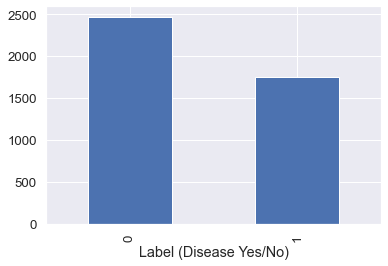

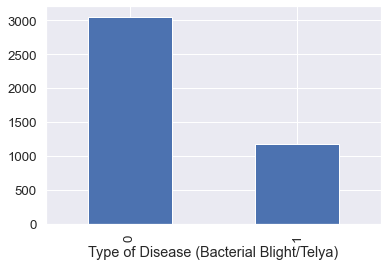

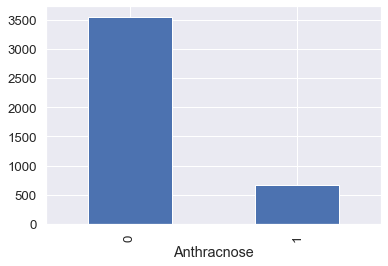

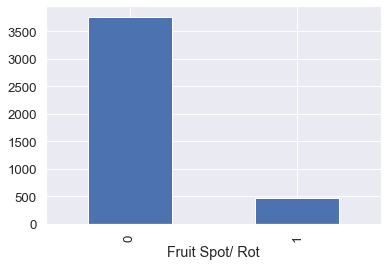

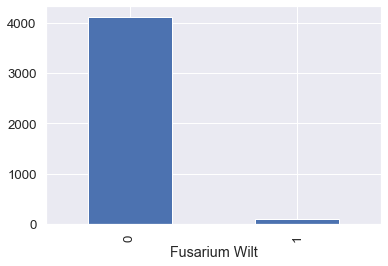

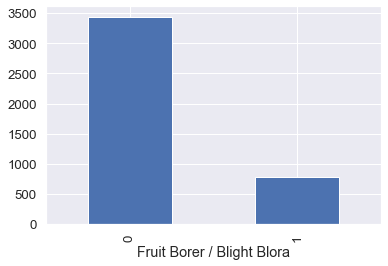

In [19]:
data = df.iloc[:, -6:].copy()

for fetures in data.columns:
    data.groupby(fetures)[fetures].count().plot.bar()
    plt.show()

# Observation :

1. Handle missing values by replacing nan with 0.

2. Also able to get the idea of data imbalancing.

# Handle Temporal variables

In [20]:
# split into day, month and year
df['date'] = [int(str(df['observation'][i]).split(' ')[0].split('-')[2]) for i in range(len(df))]
df['month'] = [int(str(df['observation'][i]).split(' ')[0].split('-')[1]) for i in range(len(df))]
df['year'] = [int(str(df['observation'][i]).split(' ')[0].split('-')[0]) for i in range(len(df))]
df.head()

,observation,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,Relative humidity_6to7,Relative humidity_avg(%),windspeedKmph_7to8,windspeedKmph_1to2,windspeedKmph_6to7,windspeedKmph_avg(Km/h),pressureMB_7to8,pressureMB_1to2,pressureMB_6to7,pressureMB_avg,precipMM_7to8,precipMM_1to2,precipMM_6to7,precipMM_avg(mm),weatherDesc_7to8,weatherDesc_1to2,weatherDesc_6to7,Sunshine Hours,%_soil_moisure,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora,date,month,year
0,2010-01-01,20,30,20,23,42,33,59,44,9,2,4,5,1015,1012,1013,1013,0.0,0.0,0.0,0.0,Clear,Sunny,Sunny,9.8,45,6.91,7.18,1709.0,0,0,0,0,0,0,1,1,2010
1,2010-01-02,23,29,23,25,49,40,62,50,9,3,3,5,1015,1013,1015,1014,0.0,0.0,0.0,0.0,Clear,Partly cloudy,Partly cloudy,9.8,45,6.77,7.66,1707.0,1,1,1,0,0,0,2,1,2010
2,2010-01-03,24,27,21,24,61,50,78,63,4,8,6,6,1017,1014,1015,1015,0.0,0.0,0.0,0.0,Partly cloudy,Partly cloudy,Partly cloudy,9.8,41,6.76,7.44,1707.0,0,0,0,0,0,0,3,1,2010
3,2010-01-04,23,29,20,24,57,30,52,46,5,7,6,6,1016,1012,1013,1013,0.0,0.0,0.0,0.0,Clear,Sunny,Sunny,9.8,43,7.10,7.43,1708.0,0,0,0,0,0,0,4,1,2010
4,2010-01-05,22,30,21,24,48,34,54,45,6,2,4,4,1013,1010,1012,1011,0.0,0.0,0.0,0.0,Clear,Sunny,Sunny,9.8,44,6.53,8.05,1709.0,0,0,0,0,0,0,5,1,2010


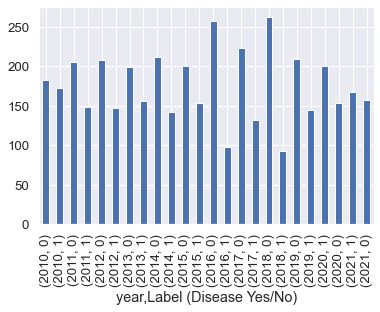

In [21]:
# finding the relation between Label (Disease Yes/No) with date, month and year
data = df.groupby('year')['Label (Disease Yes/No)'].value_counts().plot.bar()

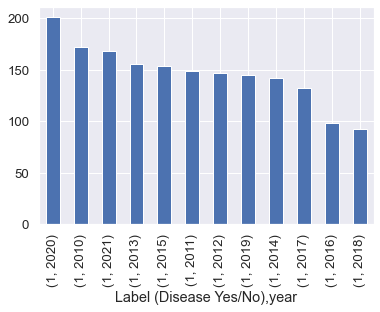

In [22]:
# find the yearly yes disease trend
data = df[df['Label (Disease Yes/No)'] == 1].groupby('Label (Disease Yes/No)')['year'].value_counts().plot.bar()

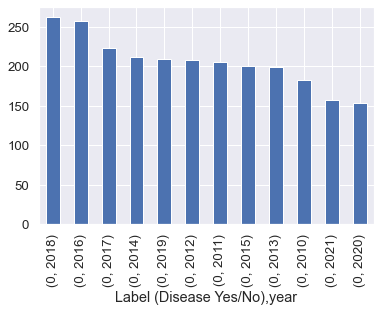

In [23]:
# find the yearly no disease trend
data = df[df['Label (Disease Yes/No)'] == 0].groupby('Label (Disease Yes/No)')['year'].value_counts().plot.bar()

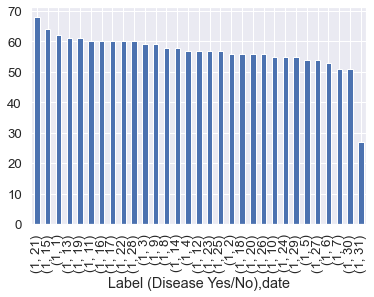

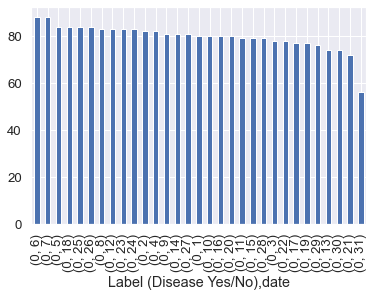

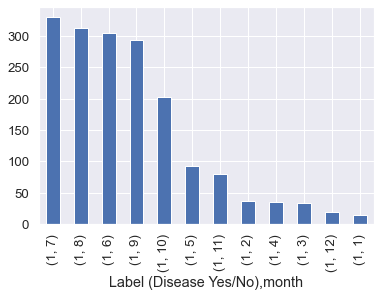

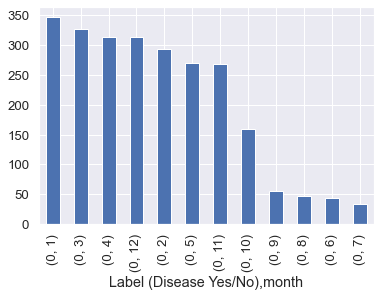

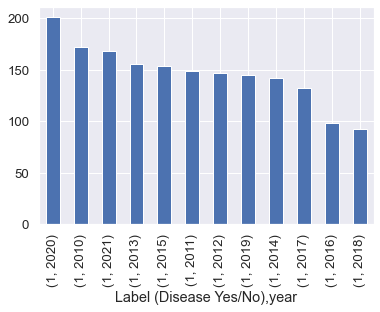

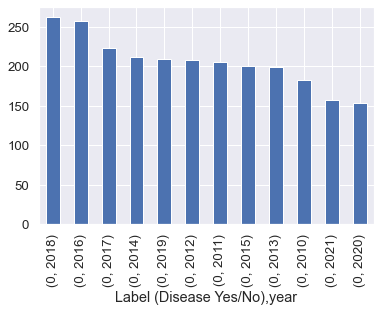

In [24]:
for fetures in ['date', 'month', 'year']:
    # find the yearly yes disease trend
    data = df[df['Label (Disease Yes/No)'] == 1].groupby('Label (Disease Yes/No)')[fetures].value_counts().plot.bar()
    plt.show()
    # find the yearly no disease trend
    data = df[df['Label (Disease Yes/No)'] == 0].groupby('Label (Disease Yes/No)')[fetures].value_counts().plot.bar()
    plt.show()

# Relation of Type of Disease (Bacterial Blight/Telya) disease with month. # 



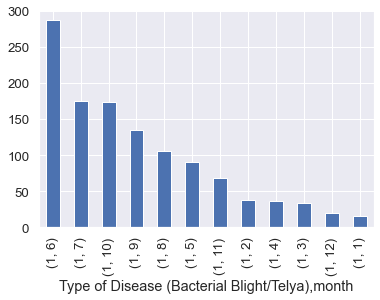



# Relation of Type of Disease (Bacterial Blight/Telya) disease with year. # 



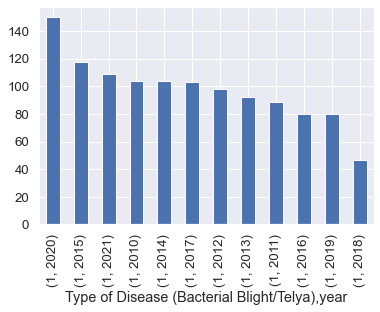



# Relation of Anthracnose disease with month. # 



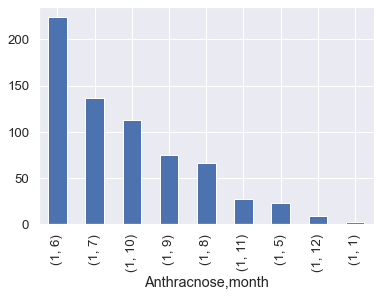



# Relation of Anthracnose disease with year. # 



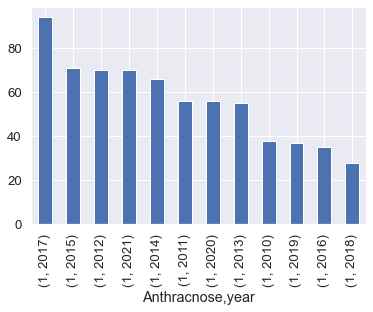



# Relation of Fruit Spot/ Rot disease with month. # 



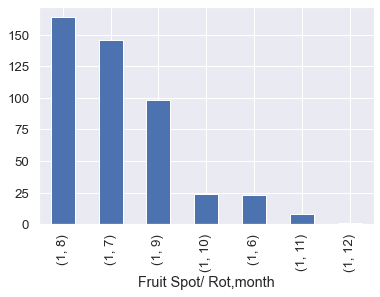



# Relation of Fruit Spot/ Rot disease with year. # 



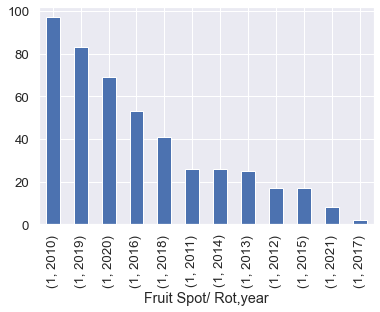



# Relation of Fusarium Wilt disease with month. # 



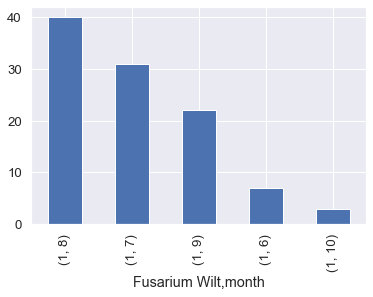



# Relation of Fusarium Wilt disease with year. # 



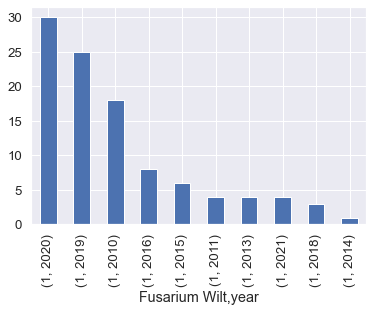



# Relation of Fruit Borer / Blight Blora disease with month. # 



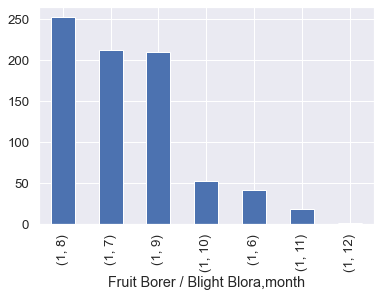



# Relation of Fruit Borer / Blight Blora disease with year. # 



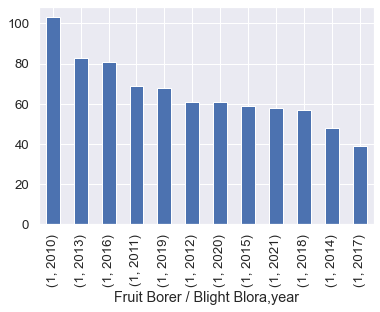

In [25]:
for column in ['Type of Disease (Bacterial Blight/Telya)', 'Anthracnose', 'Fruit Spot/ Rot', 'Fusarium Wilt', 'Fruit Borer / Blight Blora']:
    for fetures in ['month', 'year']: # 'date', 
        print(f'# Relation of {column} disease with {fetures}. # \n')
        
        # find the yearly yes disease trend
        df[df[column] == 1].groupby(column)[fetures].value_counts().plot.bar()
        plt.show()
#         # find the yearly no disease trend
#         df[df[column] == 0].groupby(column)[fetures].value_counts().plot.bar()
#         plt.show()
        
        print('\n')

# Observation :

1. Month 6th, 7th and 8th are almost common for all types of disease.

2. Disease (Bacterial Blight/Telya) disease more in 2020, 
Anthracnose disease more in 2017, 
Fruit Spot/ Rot disease more in 2010, 
Fusarium Wilt disease more in 2020, 
Fruit Borer / Blight Blora disease more in 2010.

3. As we see, Disease (Bacterial Blight/Telya) disease and Fusarium Wilt disease will / may be share some common parameter to happen; 
also, Fruit Spot/ Rot disease and Fruit Borer / Blight Blora disease do the same.

# Handle Numarical variables

In [26]:
# find the continuous and discrete variable
for fetures in numarical_fetures:
    print(f"feture {fetures}, are having {len(df[fetures].unique())} number of unique value count.")
    print(f'feture data type : {df[fetures].dtypes} ')
    print(f'Unique values are : {df[fetures].unique()} \n')

feture tempC_7to8, are having 24 number of unique value count.
feture data type : int64 
Unique values are : [20 23 24 22 21 19 25 26 27 29 28 30 31 32 33 34 35 18 17 16 36 15 14 12] 

feture tempC_1to2, are having 26 number of unique value count.
feture data type : int64 
Unique values are : [30 29 27 31 28 32 33 35 34 36 37 38 40 39 41 42 24 26 25 23 22 21 19 20
 17 18] 

feture tempC_6to7, are having 25 number of unique value count.
feture data type : int64 
Unique values are : [20 23 21 19 18 22 24 25 26 27 28 30 31 29 32 33 17 16 15 35 34 36 37 39
 38] 

feture tempC_avg(0C), are having 21 number of unique value count.
feture data type : int64 
Unique values are : [23 25 24 22 26 27 28 29 30 31 32 33 35 34 21 20 19 36 18 37 17] 

feture Relative humidity_7to8, are having 93 number of unique value count.
feture data type : int64 
Unique values are : [42 49 61 57 48 40 39 36 56 64 55 27 52 50 33 31 30 21 23 34 28 26 37 41
 35 53 58 51 22 16 14 15  9 12 29 54 17 19 46 44 38 32 25 18 

In [27]:
discrete_numarical_fetures = [fetures for fetures in numarical_fetures if df[fetures].dtypes != float and len(df[fetures].unique()) < 50 ]
continuous_numarical_fetures = [fetures for fetures in numarical_fetures if fetures not in discrete_numarical_fetures]
print(f'list of continuous variable : {continuous_numarical_fetures} \nlist of discrete variable : {discrete_numarical_fetures}')

list of continuous variable : ['Relative humidity_7to8', 'Relative humidity_1to2', 'Relative humidity_6to7', 'Relative humidity_avg(%)', 'precipMM_7to8', 'precipMM_1to2', 'precipMM_6to7', 'precipMM_avg(mm)', 'Sunshine Hours', 'soil_pH', 'water_pH', 'water_TDS_mgpl'] 
list of discrete variable : ['tempC_7to8', 'tempC_1to2', 'tempC_6to7', 'tempC_avg(0C)', 'windspeedKmph_7to8', 'windspeedKmph_1to2', 'windspeedKmph_6to7', 'windspeedKmph_avg(Km/h)', 'pressureMB_7to8', 'pressureMB_1to2', 'pressureMB_6to7', 'pressureMB_avg', '%_soil_moisure']


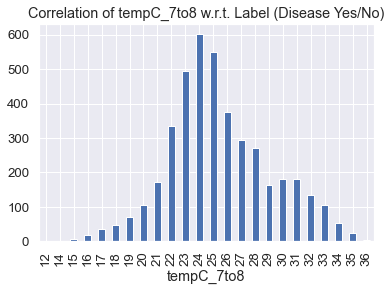

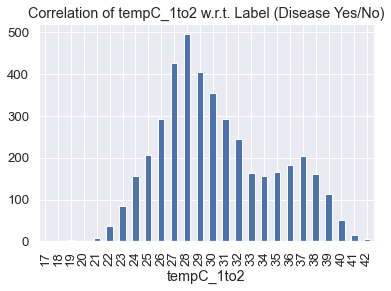

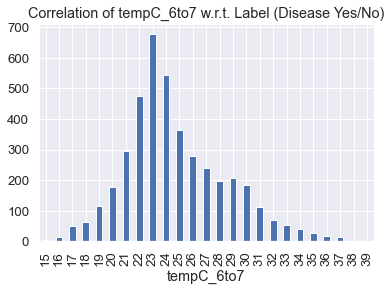

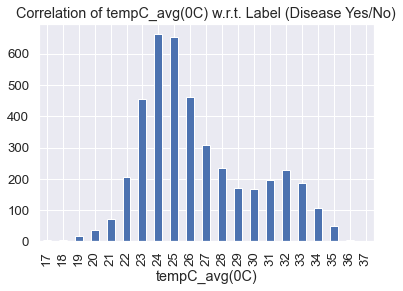

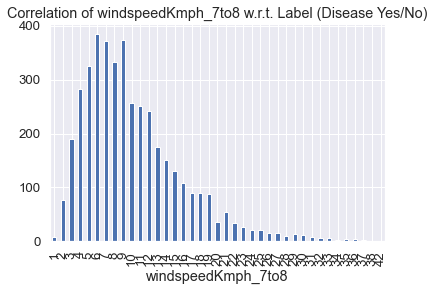

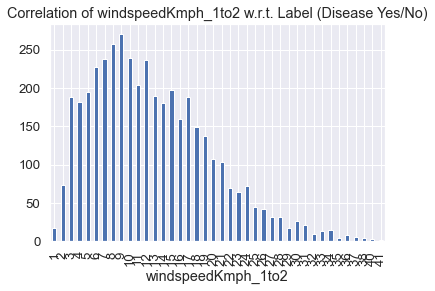

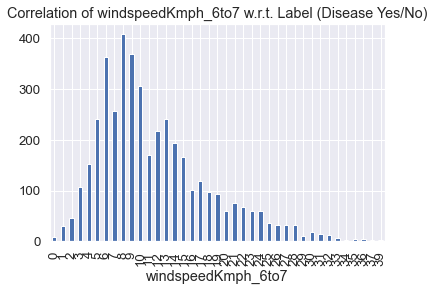

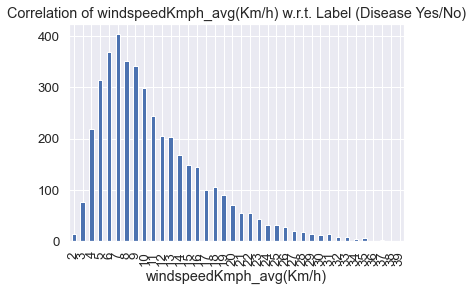

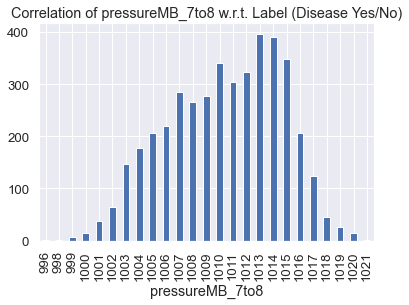

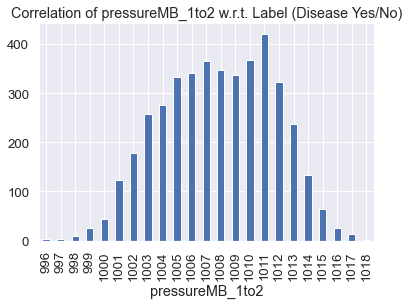

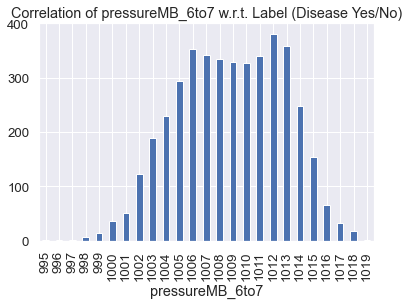

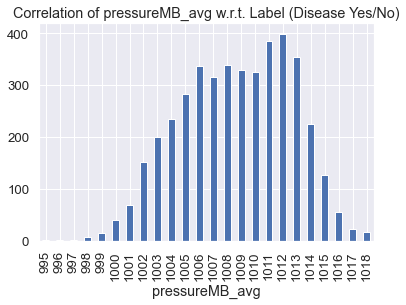

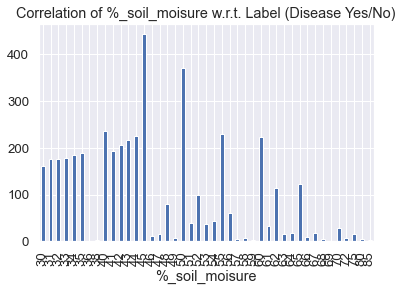

In [28]:
for fetures in discrete_numarical_fetures:
    df.groupby(fetures)['Label (Disease Yes/No)'].count().plot.bar()
    plt.title(f'Correlation of {fetures} w.r.t. Label (Disease Yes/No)')
    plt.show()

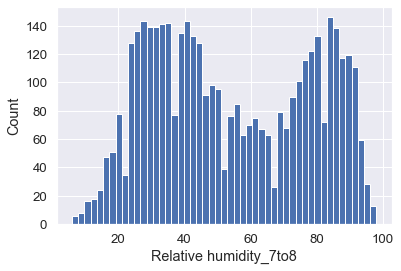

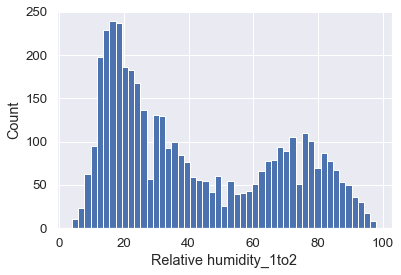

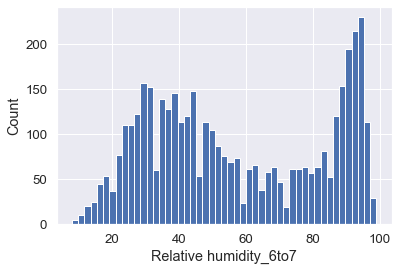

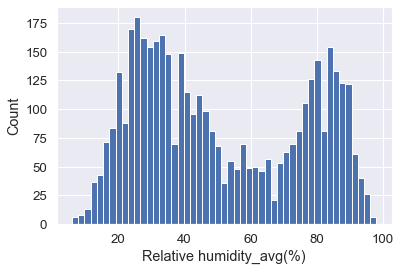

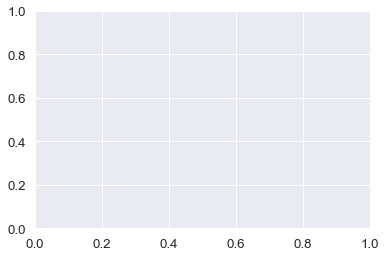

In [29]:
for fetures in continuous_numarical_fetures:
    try:
        df[fetures].hist(bins=df[fetures].max()//2)
        plt.xlabel(fetures)
        plt.ylabel('Count')
        plt.show()
    except Exception as e:
        pass

# Handle Categorical variables

In [30]:
df[categorical_fetures[0:3]]

,weatherDesc_7to8,weatherDesc_1to2,weatherDesc_6to7
0,Clear,Sunny,Sunny
1,Clear,Partly cloudy,Partly cloudy
2,Partly cloudy,Partly cloudy,Partly cloudy
3,Clear,Sunny,Sunny
4,Clear,Sunny,Sunny
...,...,...,...
4222,Clear,Sunny,Sunny
4223,Clear,Sunny,Sunny
4224,Clear,Sunny,Sunny
4225,Clear,Sunny,Light rain shower


In [31]:
keys = ['Clear', 'Cloudy', 'Fog', 'Heavy rain', 'Heavy rain at times', 'Light drizzle', 'Light rain', 'Light rain shower', 
        'Mist', 'Moderate or heavy rain shower', 'Moderate rain', 'Moderate rain at times', 'Overcast', 'Partly cloudy', 
        'Patchy light drizzle', 'Patchy light rain', 'Patchy light rain with thunder', 'Patchy rain possible', 'Sunny', 
        'Thundery outbreaks possible', 'Torrential rain shower'] 
vals = [5,4,5,1,5,3,3,3,3,1,2,2,3,4,3,3,3,3,5,2,2]

df['weatherDesc_7to8'].replace(keys, vals, inplace=True)
df['weatherDesc_1to2'].replace(keys, vals, inplace=True)
df['weatherDesc_6to7'].replace(keys, vals, inplace=True)

df[categorical_fetures[0:3]]

,weatherDesc_7to8,weatherDesc_1to2,weatherDesc_6to7
0,5,5,5
1,5,4,4
2,4,4,4
3,5,5,5
4,5,5,5
...,...,...,...
4222,5,5,5
4223,5,5,5
4224,5,5,5
4225,5,5,3


In [32]:
priority_dict = {keys[i]:vals[i] for i in range(len(keys))}
priority_dict

{'Clear': 5,
 'Cloudy': 4,
 'Fog': 5,
 'Heavy rain': 1,
 'Heavy rain at times': 5,
 'Light drizzle': 3,
 'Light rain': 3,
 'Light rain shower': 3,
 'Mist': 3,
 'Moderate or heavy rain shower': 1,
 'Moderate rain': 2,
 'Moderate rain at times': 2,
 'Overcast': 3,
 'Partly cloudy': 4,
 'Patchy light drizzle': 3,
 'Patchy light rain': 3,
 'Patchy light rain with thunder': 3,
 'Patchy rain possible': 3,
 'Sunny': 5,
 'Thundery outbreaks possible': 2,
 'Torrential rain shower': 2}

In [33]:
df['weatherDesc'] = [min(df['weatherDesc_7to8'][i],df['weatherDesc_1to2'][i],df['weatherDesc_6to7'][i]) for i in range(len(df))]

In [34]:
df['weatherDesc'].value_counts()

5    2029
3    1229
4     527
1     331
2     111
Name: weatherDesc, dtype: int64

<AxesSubplot:>

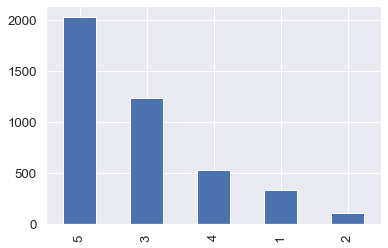

In [35]:
df['weatherDesc'].value_counts().plot.bar()

# Rearrange columns in any way you want.

In [36]:
columns = ['observation', 'date', 'month', 'year',
           'tempC_7to8', 'tempC_1to2', 'tempC_6to7', 'tempC_avg(0C)', 
           'Relative humidity_7to8', 'Relative humidity_1to2', 'Relative humidity_6to7', 'Relative humidity_avg(%)',
           'windspeedKmph_7to8', 'windspeedKmph_1to2', 'windspeedKmph_6to7', 'windspeedKmph_avg(Km/h)', 
           'pressureMB_7to8', 'pressureMB_1to2', 'pressureMB_6to7', 'pressureMB_avg', 
           'precipMM_7to8', 'precipMM_1to2', 'precipMM_6to7', 'precipMM_avg(mm)', 
           'weatherDesc_7to8', 'weatherDesc_1to2', 'weatherDesc_6to7', 'weatherDesc', 
           'Sunshine Hours', 
           '%_soil_moisure', 
           'soil_pH', 
           'water_pH', 
           'water_TDS_mgpl',
           'Label (Disease Yes/No)', 
           'Type of Disease (Bacterial Blight/Telya)',
           'Anthracnose', 
           'Fruit Spot/ Rot', 
           'Fusarium Wilt',
           'Fruit Borer / Blight Blora']
df1 = df[columns]
df1.head()

,observation,date,month,year,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,Relative humidity_6to7,Relative humidity_avg(%),windspeedKmph_7to8,windspeedKmph_1to2,windspeedKmph_6to7,windspeedKmph_avg(Km/h),pressureMB_7to8,pressureMB_1to2,pressureMB_6to7,pressureMB_avg,precipMM_7to8,precipMM_1to2,precipMM_6to7,precipMM_avg(mm),weatherDesc_7to8,weatherDesc_1to2,weatherDesc_6to7,weatherDesc,Sunshine Hours,%_soil_moisure,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora
0,2010-01-01,1,1,2010,20,30,20,23,42,33,59,44,9,2,4,5,1015,1012,1013,1013,0.0,0.0,0.0,0.0,5,5,5,5,9.8,45,6.91,7.18,1709.0,0,0,0,0,0,0
1,2010-01-02,2,1,2010,23,29,23,25,49,40,62,50,9,3,3,5,1015,1013,1015,1014,0.0,0.0,0.0,0.0,5,4,4,4,9.8,45,6.77,7.66,1707.0,1,1,1,0,0,0
2,2010-01-03,3,1,2010,24,27,21,24,61,50,78,63,4,8,6,6,1017,1014,1015,1015,0.0,0.0,0.0,0.0,4,4,4,4,9.8,41,6.76,7.44,1707.0,0,0,0,0,0,0
3,2010-01-04,4,1,2010,23,29,20,24,57,30,52,46,5,7,6,6,1016,1012,1013,1013,0.0,0.0,0.0,0.0,5,5,5,5,9.8,43,7.10,7.43,1708.0,0,0,0,0,0,0
4,2010-01-05,5,1,2010,22,30,21,24,48,34,54,45,6,2,4,4,1013,1010,1012,1011,0.0,0.0,0.0,0.0,5,5,5,5,9.8,44,6.53,8.05,1709.0,0,0,0,0,0,0


In [37]:
df1.to_csv('part6\Historical Weather Data 2010-2021_preprocessed_1.csv', index=False)

# Correlation between Disease columns

In [42]:
disease_df = df1.iloc[:, -5:]
disease_df.head()

,Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora
0,0,0,0,0,0
1,1,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [49]:
corr_matrix = round(disease_df.corr(),2)
corr_matrix

,Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora
Type of Disease (Bacterial Blight/Telya),1.00,0.70,-0.02,0.02,-0.02
Anthracnose,0.70,1.00,-0.15,-0.01,-0.13
Fruit Spot/ Rot,-0.02,-0.15,1.00,0.36,0.58
Fusarium Wilt,0.02,-0.01,0.36,1.00,-0.04
Fruit Borer / Blight Blora,-0.02,-0.13,0.58,-0.04,1.00


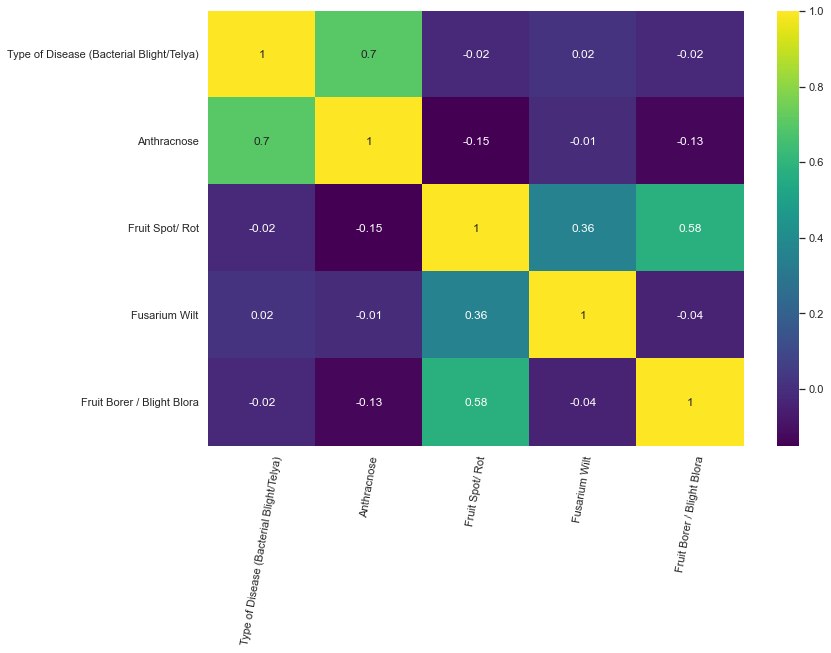

In [50]:
sns.set(rc={'figure.figsize':(12,8)})

# plotting the heatmap
hm = sns.heatmap(data = corr_matrix, annot=True, cmap="viridis" ,fmt='g')
hm.set_xticklabels(labels=list(corr_matrix.columns), rotation=80)

plt.savefig('heatmap_disease_corr_matrix.png', dpi=200, pad_inches=0.15)

# displaying the plotted heatmap
plt.show()

### Observation:

- The correlation between disease Bacterial Blight/Telya and Anthracnose is 70%. 
- So, there is high possibility that they required similar weather conditions to grow.
- Remaining three diseases are not showing the high correlation it means they need independent weather condition to grow.